<a href="https://colab.research.google.com/github/dushyantnagar7806/-British_Airway_Data_Science_Project/blob/main/British_Airways_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The First Task

## Web scraping and analysis

The first thing to do will be to scrape review data from the web. For this, you should use a website called [this](https://www.airlinequality.com/) .

The team leader wants you to focus on reviews specifically about the airline itself. You should collect as much data as you can in order to improve the output of your analysis. To get started with the data collection, you can use the “Jupyter Notebook” in the Resources section below to run some Python code that will help to collect some data.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
#imports

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
# Initialize lists to store scraped data

reviews  = []
stars = []
date = []
country = []


In [3]:
pages = 10
page_size = 100

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html.parser")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)

    #date
    for item in soup.find_all("time"):
        date.append(item.text)

    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

    print(f"   ---> {len(reviews)} total reviews")

# Check if all lists have the same length
if len(reviews) == len(date) == len(country):
    # Create the DataFrame using the lists (excluding 'stars')
    df = pd.DataFrame({"reviews": reviews, "date": date, "country": country})
    print("DataFrame created successfully!")
else:
    print("Error: Lists have different lengths.")
    print(f"Length of 'reviews': {len(reviews)}")
    print(f"Length of 'date': {len(date)}")
    print(f"Length of 'country': {len(country)}")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
DataFrame created successfully!


In [4]:
df.head()

,reviews,date,country
0,✅ Trip Verified | Flying A380 business class ...,2nd September 2023,Australia
1,✅ Trip Verified | British Airways absolutely ...,1st September 2023,United Kingdom
2,✅ Trip Verified | My recent experience with B...,1st September 2023,United States
3,✅ Trip Verified | This is to express our disp...,31st August 2023,United States
4,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023,United Kingdom


In [5]:
stars = []
page = 10
page_size =100
for i in range(1, pages + 1):

    for item in soup.find_all("div", class_="rating-10"):
        star_rating = item.span.text.strip() if item.span else "N/A"
        stars.append(star_rating)

stars_df = pd.DataFrame({"stars": stars})

In [6]:
stars_df.head()

,stars
0,5
1,10
2,3
3,2
4,3


In [7]:
combined_df = pd.concat([df, stars_df], axis=1)
print(combined_df.head())

                                             reviews                date  \
0  ✅ Trip Verified |  Flying A380 business class ...  2nd September 2023   
1  ✅ Trip Verified |  British Airways absolutely ...  1st September 2023   
2  ✅ Trip Verified |  My recent experience with B...  1st September 2023   
3  ✅ Trip Verified |  This is to express our disp...    31st August 2023   
4  ✅ Trip Verified |  I flew London to Malaga on ...    30th August 2023   

          country stars  
0       Australia     5  
1  United Kingdom    10  
2   United States     3  
3   United States     2  
4  United Kingdom     3  


In [8]:
combined_df.shape

(1010, 4)

In [9]:
import pandas as pd

# Assuming you have already loaded your DataFrame (df)
# If 'reviews' is currently the index, reset it to a regular column
combined_df.reset_index(inplace=True)

# Add a new 'SNo' column to your DataFrame
df['SNo'] = df.index + 1

In [10]:
import os
csv_file_path = os.path.join(os.getcwd(), "BA_reviews.csv")
combined_df.to_csv(csv_file_path, index=False)

In [11]:
combined_df.head()

,index,reviews,date,country,stars
0,0,✅ Trip Verified | Flying A380 business class ...,2nd September 2023,Australia,5
1,1,✅ Trip Verified | British Airways absolutely ...,1st September 2023,United Kingdom,10
2,2,✅ Trip Verified | My recent experience with B...,1st September 2023,United States,3
3,3,✅ Trip Verified | This is to express our disp...,31st August 2023,United States,2
4,4,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023,United Kingdom,3


# Task 2

---

## Data Cleaning

In [12]:
cwd = os.getcwd()
df = pd.read_csv("BA_reviews.csv", index_col=0)

In [13]:
df.head()

,reviews,date,country,stars
index,,,,
0,✅ Trip Verified | Flying A380 business class ...,2nd September 2023,Australia,5
1,✅ Trip Verified | British Airways absolutely ...,1st September 2023,United Kingdom,10
2,✅ Trip Verified | My recent experience with B...,1st September 2023,United States,3
3,✅ Trip Verified | This is to express our disp...,31st August 2023,United States,2
4,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023,United Kingdom,3


In [14]:
# Reset the 'reviews' index to a regular column
df.reset_index(inplace=True)

# Convert the 'reviews' column to a string data type
df['reviews'] = df['reviews'].astype(str)

# Add the 'verified' column based on whether the review starts with "✅ Trip Verified"
df['verified'] = df['reviews'].str.startswith('✅ Trip Verified')

# If you only want the first part before '|' in the 'reviews' column, you can use the split operation as follows:
# df['reviews'] = df['reviews'].str.split('|').str[0].str.strip()

In [15]:
df.head()

,index,reviews,date,country,stars,verified
0,0,✅ Trip Verified | Flying A380 business class ...,2nd September 2023,Australia,5,True
1,1,✅ Trip Verified | British Airways absolutely ...,1st September 2023,United Kingdom,10,True
2,2,✅ Trip Verified | My recent experience with B...,1st September 2023,United States,3,True
3,3,✅ Trip Verified | This is to express our disp...,31st August 2023,United States,2,True
4,4,✅ Trip Verified | I flew London to Malaga on ...,30th August 2023,United Kingdom,3,True


In [16]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [17]:
df.head()

,index,reviews,date,country,stars,verified
0,0,Flying A380 business class should be a pleas...,2nd September 2023,Australia,5,True
1,1,British Airways absolutely does not care. My...,1st September 2023,United Kingdom,10,True
2,2,My recent experience with British Airways wa...,1st September 2023,United States,3,True
3,3,This is to express our displeasure and conce...,31st August 2023,United States,2,True
4,4,I flew London to Malaga on 27 August in Club...,30th August 2023,United Kingdom,3,True


In [18]:
df.dtypes

index        int64
reviews     object
date        object
country     object
stars        int64
verified      bool
dtype: object

In [19]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)

In [20]:
df.date.head()

0   2023-09-02
1   2023-09-01
2   2023-09-01
3   2023-08-31
4   2023-08-30
Name: date, dtype: datetime64[ns]

In [21]:
#check for unique values
df.stars.unique()

array([ 5, 10,  3,  2,  9,  7,  1,  6,  4,  8])

In [22]:
df.stars.value_counts()

1     270
2     160
3     120
7     100
10     90
9      70
6      60
4      60
5      40
8      40
Name: stars, dtype: int64

In [23]:
df.isnull().sum()

index        0
reviews     10
date        10
country     10
stars        0
verified     0
dtype: int64

In [24]:
# Use dropna() to remove rows with NaT and NaN values
df.dropna(how='any', inplace=True)

In [25]:
df.isnull().sum()

index       0
reviews     0
date        0
country     0
stars       0
verified    0
dtype: int64

In [26]:
#resetting the index
df.reset_index(drop=True)

,index,reviews,date,country,stars,verified
0,0,Flying A380 business class should be a pleas...,2023-09-02,Australia,5,True
1,1,British Airways absolutely does not care. My...,2023-09-01,United Kingdom,10,True
2,2,My recent experience with British Airways wa...,2023-09-01,United States,3,True
3,3,This is to express our displeasure and conce...,2023-08-31,United States,2,True
4,4,I flew London to Malaga on 27 August in Club...,2023-08-30,United Kingdom,3,True
...,...,...,...,...,...,...
995,995,Heathrow to Athens on A321. Arrived at the a...,2018-11-02,United Kingdom,4,True
996,996,London to Bangkok. I am not a fan if the BA c...,2018-11-01,Australia,1,True
997,997,"Abu Dhabi to London. Although a BA flight, t...",2018-10-28,United Kingdom,8,True
998,998,"Gatwick to Orlando. Stains on the seat, cott...",2018-10-27,United States,5,True


In [27]:
# export the cleaned data

df.to_csv(cwd + "/cleaned_BA_reviews.csv")

# Task 2

---

## Data Visualization

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [29]:

# create the dataframe
cws = os.getcwd()
df = pd.read_csv(cws +"/cleaned_BA_reviews.csv", index_col=0)

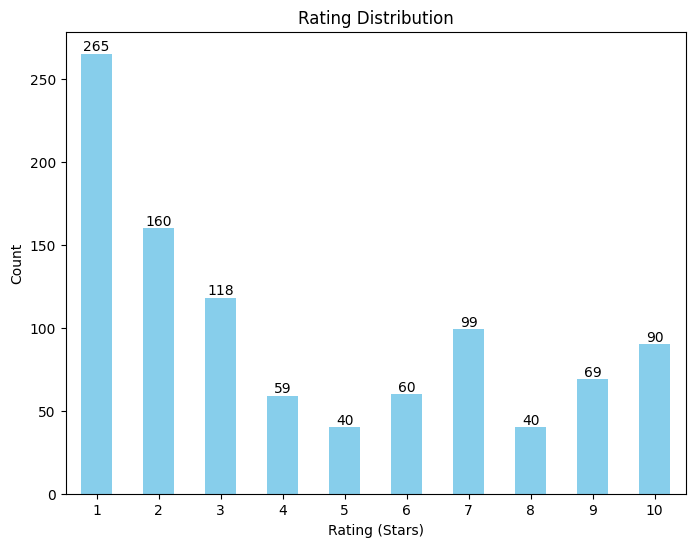

In [30]:
# Visualize Rating Distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
rating_counts = df['stars'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Show labels on the bars
for index, value in enumerate(rating_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)

# Now, display the plot
plt.show()

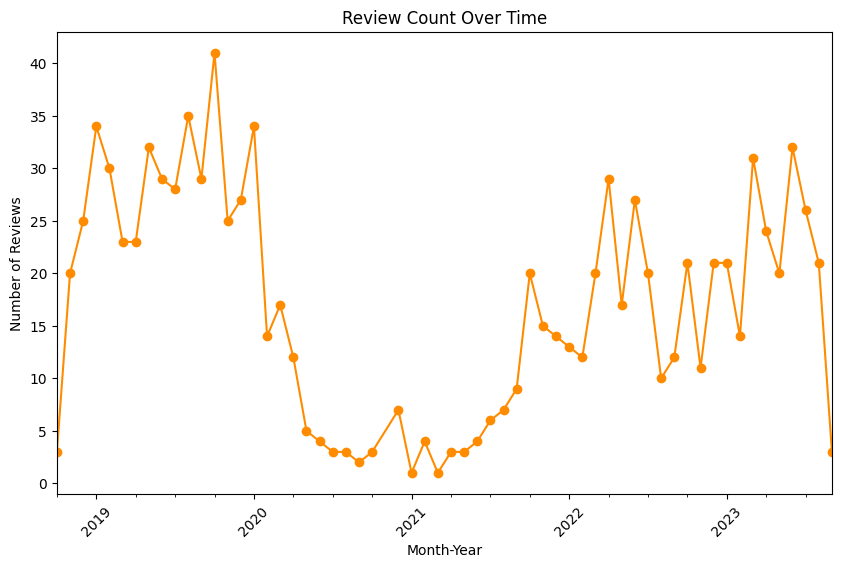

In [31]:
# Visualize Review Count Over Time

df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.to_period('M')

plt.figure(figsize=(10, 6))
df['month_year'].value_counts().sort_index().plot(kind='line', marker='o', color='darkorange')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.title('Review Count Over Time')
plt.xticks(rotation=45)


# Now, display the plot
plt.show()

let's move on to visualizing the number of reviews by country. We can create a bar chart or a choropleth map to display the distribution of reviews from different countries. For this task, we'll use a bar chart to show the review count for each country.

## Data Preparation
Before creating the bar chart, we need to group the data by country and count the number of reviews for each country. We'll use the groupby function in Pandas to achieve this.

In [32]:
# Count the review occurrences for each country and reset the index to get it as a DataFrame
reviews_by_country = df['country'].value_counts().reset_index()

# Rename the columns to have meaningful names
reviews_by_country.columns = ['Country', 'Review Count']

# Print the first few rows of the DataFrame
print(reviews_by_country.head())

# To get the total number of countries involved, We can use the following:
total_countries_involved = reviews_by_country.shape[0]

          Country  Review Count
0  United Kingdom           571
1   United States           165
2       Australia            35
3          Canada            32
4    South Africa            19


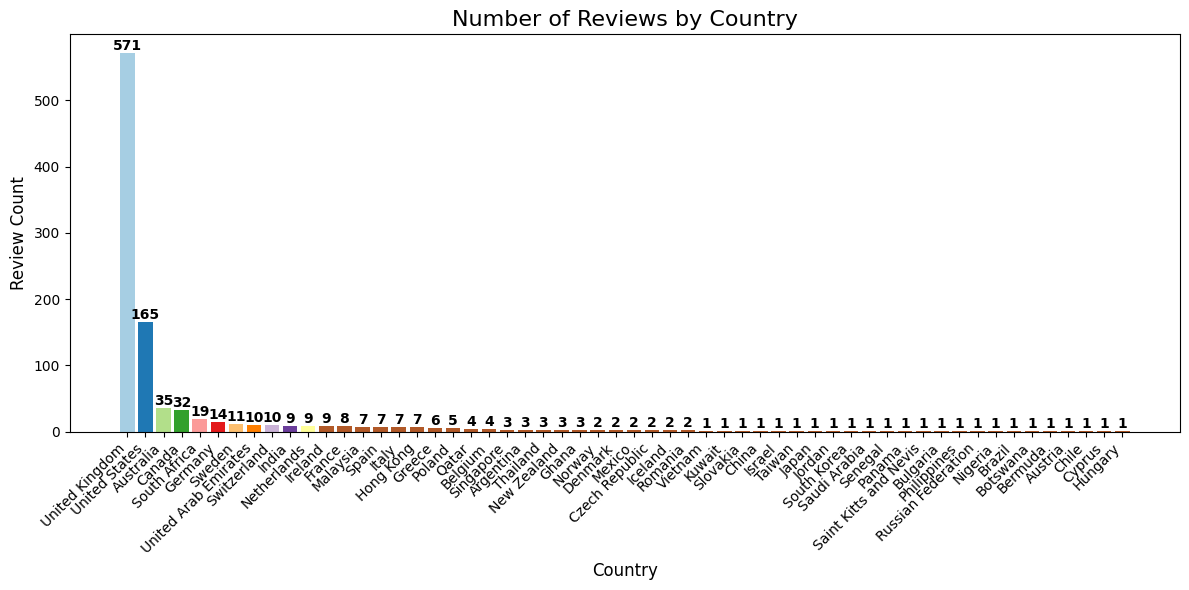

In [33]:
# Now, let's plot the number of reviews for each country using a bar chart.

plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(reviews_by_country)))
plt.bar(reviews_by_country['Country'], reviews_by_country['Review Count'], color=colors)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Number of Reviews by Country', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add annotations on top of the bars
for i, count in enumerate(reviews_by_country['Review Count']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()

# Now, display the plot
plt.show()

### Top Positive & Negative Keyword

To find the top positive and negative keywords from the reviews, we need to perform text analysis on the review text. We can use natural language processing (NLP) techniques to extract important words from the text and then calculate their frequency.

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter


# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in word_tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Apply text preprocessing to the reviews
df['processed_reviews'] = df['reviews'].apply(preprocess_text)

In [37]:
# Combine all processed reviews into a single list
all_words = [word for review in df['processed_reviews'] for word in review]

# Count the occurrences of each word
word_freq = Counter(all_words)

In [38]:
# Define the number of top positive and negative keywords to extract
num_top_keywords = 10

# Extract top positive keywords
top_positive_keywords = word_freq.most_common(num_top_keywords)

# To get top negative keywords, we can use the `most_common` method with a negative value for the threshold
top_negative_keywords = word_freq.most_common(-num_top_keywords)

print("Top Positive Keywords:")
print(top_positive_keywords)

print("\nTop Negative Keywords:")
print(top_negative_keywords)

Top Positive Keywords:
[('flight', 1838), ('ba', 1131), ('service', 706), ('london', 583), ('seat', 505), ('time', 473), ('food', 458), ('crew', 448), ('one', 418), ('good', 414)]

Top Negative Keywords:
[]


## Visualization top positive keyword using barplot

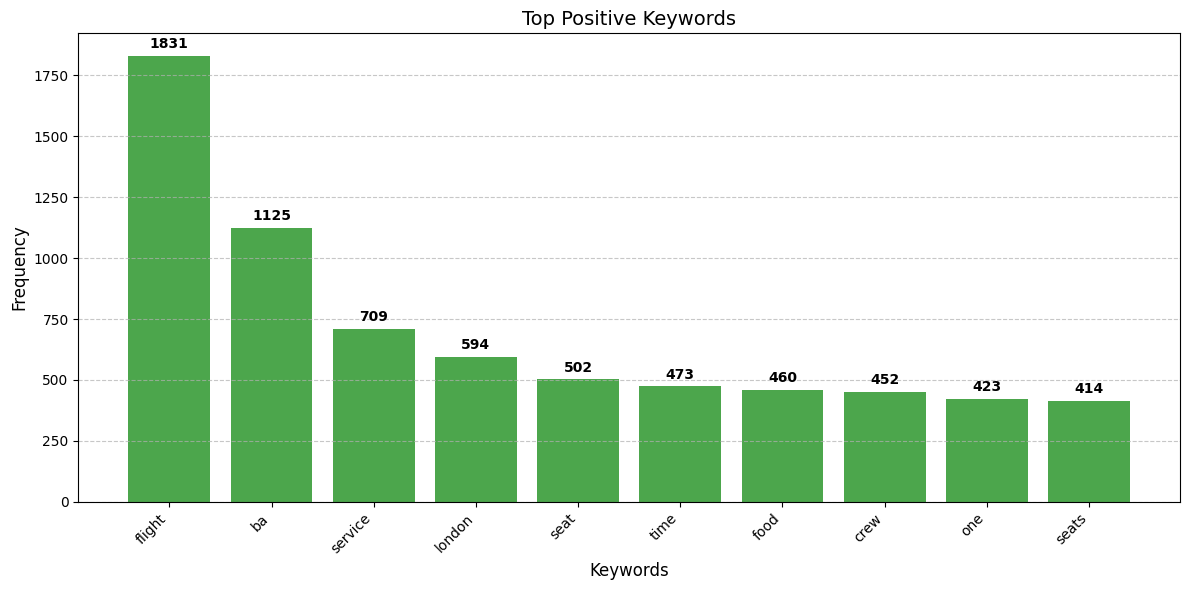

In [39]:
import matplotlib.pyplot as plt

# Provided top positive keywords
top_positive_keywords = [('flight', 1831), ('ba', 1125), ('service', 709), ('london', 594), ('seat', 502), ('time', 473), ('food', 460), ('crew', 452), ('one', 423), ('seats', 414)]

# Visualization for top positive keywords
plt.figure(figsize=(12, 6))
bars = plt.bar([kw[0] for kw in top_positive_keywords], [kw[1] for kw in top_positive_keywords], color='green', alpha=0.7)

# Add text annotations above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Positive Keywords', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Now, display the plot
plt.show()

## Average Rating by Country
choropleth map to show the average rating for each country. This can provide insights into how customers from different countries perceive the airline.



In [40]:
import pandas as pd
import plotly.graph_objects as go

# Check the columns in your DataFrame
print(df.columns)

# Set the 'country' column as the index
df.set_index('country', inplace=True)

# Group the DataFrame by 'country' and calculate the mean of 'stars' for each group
average_rating_by_country = df.groupby(df.index)['stars'].mean().reset_index()

# Sort the data in descending order based on the average rating
average_rating_by_country = average_rating_by_country.sort_values(by='stars', ascending=False)

# Print the top 10 countries with the highest average ratings
print(average_rating_by_country.head(10))

Index(['index', 'reviews', 'date', 'country', 'stars', 'verified',
       'month_year', 'processed_reviews'],
      dtype='object')
               country  stars
6               Brazil   10.0
26              Jordan   10.0
41        Saudi Arabia    9.0
46         South Korea    8.0
9                Chile    8.0
12      Czech Republic    8.0
50              Taiwan    7.0
49         Switzerland    6.5
13             Denmark    6.5
39  Russian Federation    6.0


In [41]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Assuming you have already created the 'average_rating_by_country' DataFrame

# Create the choropleth map
plot = go.Figure(data=go.Choropleth(
    locations=average_rating_by_country['country'],  # Country names
    z=average_rating_by_country['stars'],  # Average rating values
    locationmode='country names',
    colorscale='Viridis',  # Choose a colorscale (you can use other colorscales)
    colorbar_title='Average Rating',
    hovertext=average_rating_by_country['stars'].round(2).astype(str),  # Hover text for each country
    text=average_rating_by_country['country']  # Country names to display on the map
))

# Update the layout of the map
plot.update_layout(
    title_text='Average Rating by Country',
    geo=dict(
        showcoastlines=True,  # Show country coastlines
        showland=True,  # Show land boundaries
        projection_type='equirectangular',  # Choose a projection type (you can use other projections)
    )
)


# Display the choropleth map
plot.show()

## Most Frequent Complaints
Identify the most common complaints from the review text and visualize them using a bar chart. This can give you an idea of the main pain points for customers.

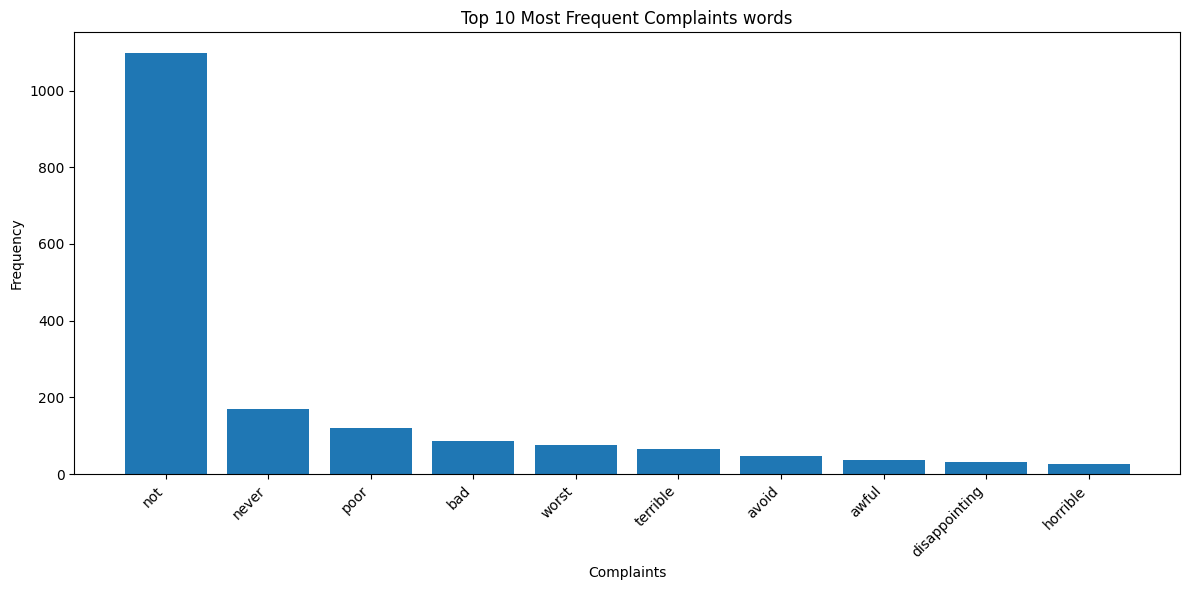

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can read your dataset using pd.read_csv('your_dataset.csv')

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'reviews' column to get the bag-of-words representation
X = vectorizer.fit_transform(df['reviews'])

# Get the feature names (i.e., words or phrases) from the CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Calculate the sum of each word or phrase across all reviews
word_counts = X.sum(axis=0).A1

# Create a dictionary to store the word counts
word_count_dict = dict(zip(feature_names, word_counts))

# Define a list of negative sentiment words and phrases
negative_sentiments = ['bad', 'terrible', 'worst', 'horrible', 'poor', 'awful', 'disappointing', 'not', 'never', 'avoid']

# Find the top 10 most frequent complaints (negative sentiment words)
most_common_complaints = [(word, count) for word, count in word_count_dict.items() if word in negative_sentiments]

# Sort the complaints based on frequency in descending order
most_common_complaints.sort(key=lambda x: x[1], reverse=True)

# Extract the top 10 complaints and their frequencies
top_complaints, frequencies = zip(*most_common_complaints[:10])

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(top_complaints, frequencies)
plt.xlabel('Complaints')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Complaints words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Now, display the plot
plt.show()

# Sentiment Analysis

In [43]:
# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [44]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can read your dataset using pd.read_csv('your_dataset.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score from VADER
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Apply the sentiment analysis function to the 'reviews' column and store the scores in a new column
df['sentiment_score'] = df['reviews'].apply(get_sentiment_score)

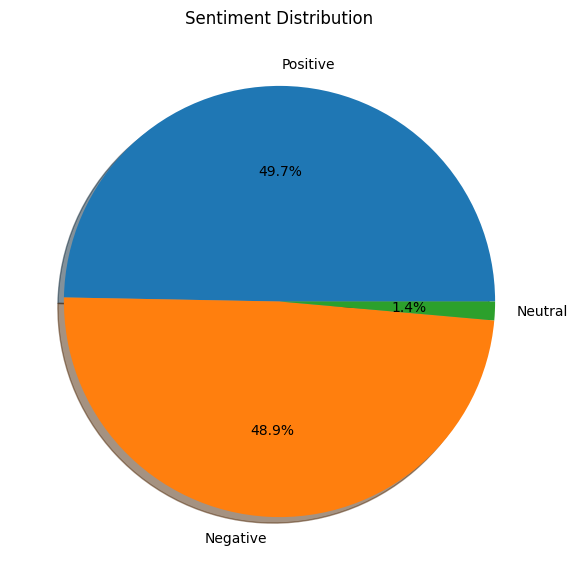

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'
# If not, you can read your dataset using pd.read_csv('your_dataset.csv')

# Let's create a new column 'sentiment_category' to categorize sentiments as positive, negative, or neutral
df['sentiment_category'] = df['sentiment_score'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Calculate the counts for each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.title("Sentiment Distribution")
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', shadow=True)


# Now, display the plot
plt.show()

# World Association
Word association is important for understanding relationships, sentiment analysis, language patterns, and uncovering hidden meanings in text data.

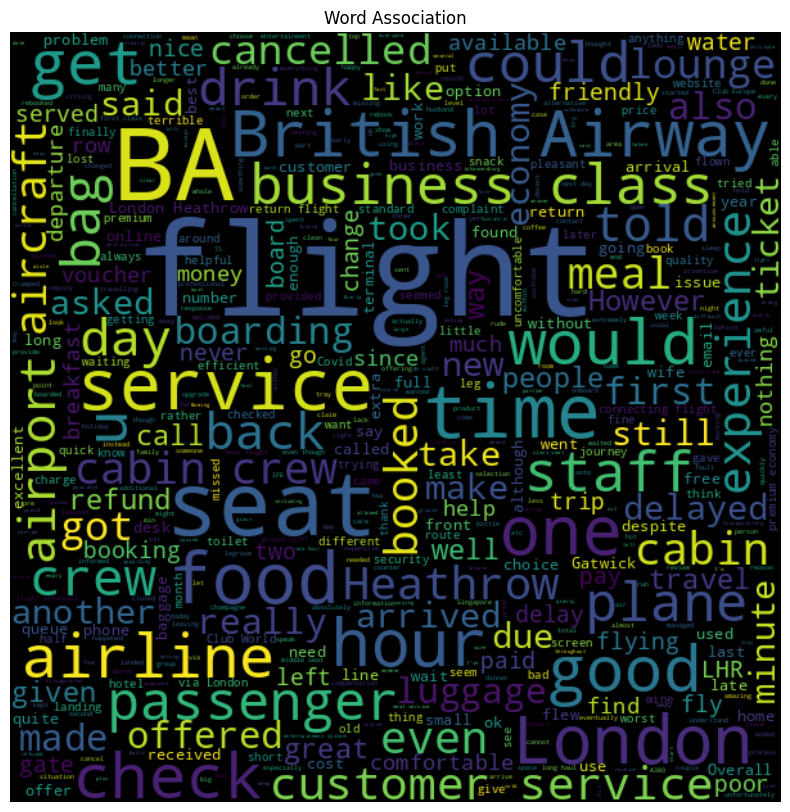

In [46]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Start with one review:
reviews = " ".join(df['reviews'])

plt.figure(figsize=(20, 10))

# Use nltk.corpus.stopwords instead of importing 'stopwords' module
stop_words = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stop_words).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Association")


# Now, display the plot
plt.show()

### Average overall rating given for British Airways

## Average Overall Rating

In [47]:
df.stars.mean()

4.269

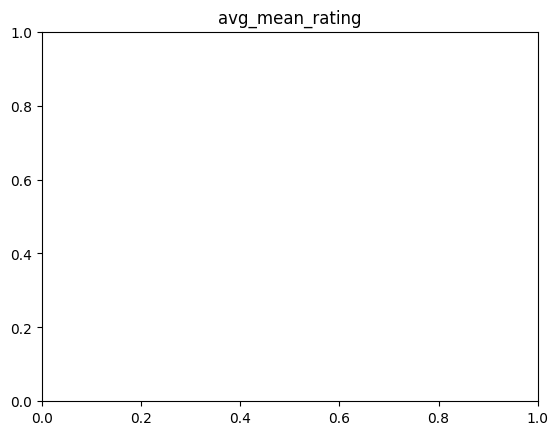

In [52]:
from PIL import Image, ImageDraw, ImageFont

mean_value = 4.269

# Create an image with a white background
image = Image.new("RGB", (100, 50), "white")

# Create a drawing context
draw = ImageDraw.Draw(image)

# Set the font and position for the text
font = ImageFont.load_default()
position = (10, 10)

# Convert the mean value to a string and draw it on the image
mean_value_str = "{:.3f}".format(mean_value)  # Format the mean value to 3 decimal places
draw.text(position, mean_value_str, fill="black", font=font)
plt.title('avg_mean_rating')


# Now, display the image
image.show()